# News Analysis Project: Uncover What Matters!!!

### Load and Preprocess the data

In [1]:
# importing libraries to load the dataset and for preprocessing
import pandas as pd
import numpy as np

In [2]:
# load the dataset
df = pd.read_excel("C:/Users/Rebel/Desktop/DS/IS/Teco/Assignment.xlsx")
df.head()

,Article
0,"Retailers, the makers of foods marketed for we..."
1,"Move over, Ozempic — there’s a new drug in tow..."
2,Sept 14 (Reuters) - Bristol Myers Squibb (BMY....
3,Austin Wolcott was 18 years old and pretty sur...
4,"Cancer, often referred to as the “emperor of a..."


In [3]:
# data preprocessing

In [4]:
df.shape

(25, 1)

In [5]:
df.isnull().sum()

Article    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Article  25 non-null     object
dtypes: object(1)
memory usage: 332.0+ bytes


### 1.) Clean Up Articles: We'll remove unnecessary clutter like punctuation and common words to focus on the main ideas.

In [7]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [8]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'at', 'through', 'ourselves', 'most', 'before', 'than', "should've", 'under', 'their', 'couldn', 'doing', 'hers', 'it', 'do', 'isn', 'that', 'they', 'those', 'am', 'a', "won't", 'both', 'to', 'itself', "mightn't", 'them', 'each', 've', 'himself', 's', 'weren', 'in', 'him', 'against', 'me', "you're", "didn't", 'm', 'yours', "she's", 'down', 'is', 'myself', 'mightn', 'herself', 'can', 'here', 'my', 'been', 'own', "aren't", 'for', "wouldn't", 'until', "haven't", 'his', 'had', 'as', 'when', 'ma', 'your', 'won', 'what', 'by', 'd', 'same', 'an', 'aren', 'she', "it's", 'but', 'other', 'from', 'which', 'you', "you'll", 'does', "you've", 'into', 'if', 'not', 'so', 'some', 'where', 't', 'doesn', 'were', "you'd", 'our', 'too', 'who', "mustn't", 'didn', "hadn't", 'while', 'how', 'now', 'and', 'whom', 'll', 'up', 'needn', 'all', 'are', 'more', 'the', 'such', 'during', 'hasn', 'shouldn', 'no', 'on', 'did', "hasn't", 'then', 'theirs', 'yourself', 'because', 'has', 'there', 'was', 'about', 'after', '

In [9]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [10]:
df.Article = df['Article'].apply(data_processing)

In [11]:
df = df.drop_duplicates('Article')

In [12]:
from nltk.stem import PorterStemmer

In [13]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [14]:
df['Article'] = df['Article'].apply(lambda x: stemming(x))

In [15]:
df.head()

,Article
0,retailers makers foods marketed weight loss ty...
1,move ozempic theres new drug town eli lillys z...
2,sept 14 reuters bristol myers squibb bmyn said...
3,austin wolcott 18 years old pretty sure wouldn...
4,cancer often referred emperor maladies unyield...


### 2.) Check the Mood: We'll build a system to figure out if an article is happy, sad, or neutral about a topic.

In [16]:
from textblob import TextBlob

In [17]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [18]:
df['polarity'] = df['Article'].apply(polarity)

In [19]:
df.head()

,Article,polarity
0,retailers makers foods marketed weight loss ty...,0.060782
1,move ozempic theres new drug town eli lillys z...,-0.096854
2,sept 14 reuters bristol myers squibb bmyn said...,0.036147
3,austin wolcott 18 years old pretty sure wouldn...,0.059811
4,cancer often referred emperor maladies unyield...,0.199668


In [20]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [21]:
df['Sentiment'] = df['polarity'].apply(sentiment)
df.head(8)

,Article,polarity,Sentiment
0,retailers makers foods marketed weight loss ty...,0.060782,Positive
1,move ozempic theres new drug town eli lillys z...,-0.096854,Negative
2,sept 14 reuters bristol myers squibb bmyn said...,0.036147,Positive
3,austin wolcott 18 years old pretty sure wouldn...,0.059811,Positive
4,cancer often referred emperor maladies unyield...,0.199668,Positive
5,nov 28 reuters us food drug administration fda...,0.076199,Positive
6,nov 21 reuters beigene 6160hk said tuesday ent...,0.138095,Positive
7,sept 19 reuters drugmaker beigene 6160hk said ...,0.000000,Neutral


### Visualization of Sentiments

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

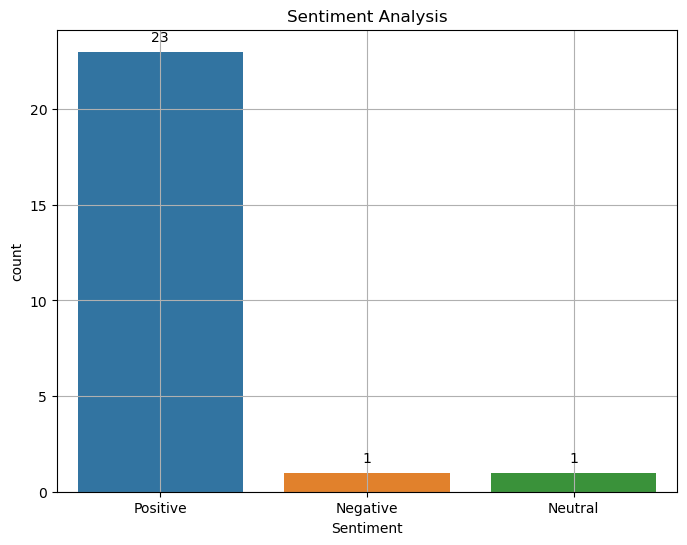

In [23]:
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(x='Sentiment', data=df)
plt.grid(True)
plt.title("Sentiment Analysis")

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points')

plt.show()

Text(0.5, 1.0, 'Distribution of sentiments')

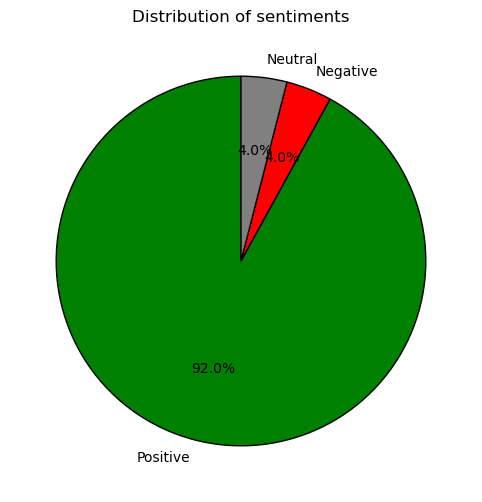

In [24]:
fig = plt.figure(figsize=(8,6))
colors = ("green", "red", "grey")
wp = {'linewidth':1, 'edgecolor':"black"}
tags = df['Sentiment'].value_counts()
tags.plot(kind='pie', autopct='%1.1f%%', colors = colors,
         startangle=90, wedgeprops = wp, label='')
plt.title('Distribution of sentiments')

##### Insights:
    1.) There are total 23 articles that shows positive sentiment.
    2.) 1 article shows negative sentiment.
    3.) 1 article shows neutral sentiment.

### Visualization of Sentiments by WordCloud and plotting different logos

In [25]:
from wordcloud import WordCloud
from PIL import Image
import stylecloud

In [26]:
pos_words_in_art = df[df.Sentiment == 'Positive']
pos_words_in_art = pos_words_in_art.sort_values(['polarity'], ascending= False)
pos_words_in_art.head()

,Article,polarity,Sentiment
22,london sept 19 reuters nestle said tuesday pic...,0.304167,Positive
19,strava made possible nike run club nrc nike tr...,0.256466,Positive
4,cancer often referred emperor maladies unyield...,0.199668,Positive
14,taco bell serving new toasted breakfast tacos ...,0.198189,Positive
16,whether dip drizzle put chicken nuggets french...,0.193182,Positive


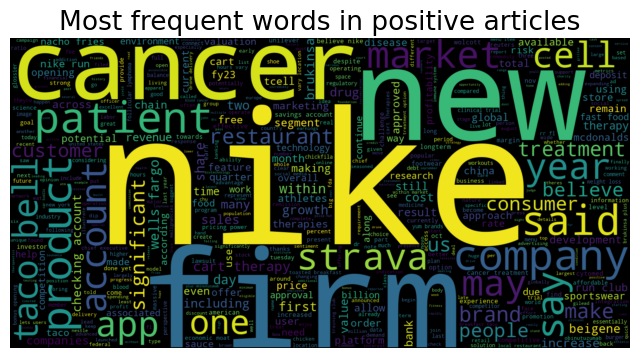

In [27]:
text = ' '.join([word for word in pos_words_in_art['Article']])
plt.figure(figsize=(8,6), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive articles', fontsize=19)
plt.show()

# Ploted Leaf logo 
leaf_logo = stylecloud.gen_stylecloud(text = text,size=756,icon_name='fas fa-leaf',
                                      palette='colorbrewer.sequential.Greens_5',
                                      background_color='black',output_name='leafstylecloud.png')

image1 = Image.open('leafstylecloud.png')
image1.show()

In [28]:
neg_words_in_art = df[df.Sentiment == 'Negative']
neg_words_in_art = neg_words_in_art.sort_values(['polarity'], ascending= False)
neg_words_in_art

,Article,polarity,Sentiment
1,move ozempic theres new drug town eli lillys z...,-0.096854,Negative


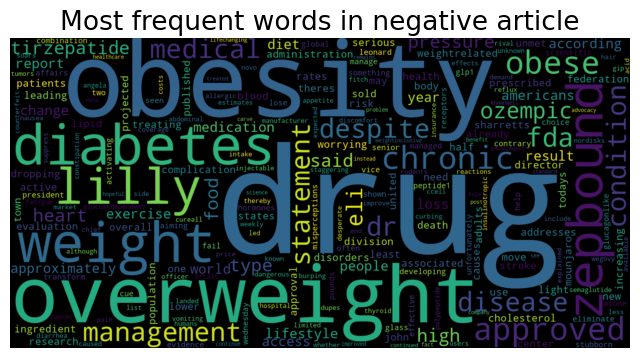

In [29]:
text = ' '.join([word for word in neg_words_in_art['Article']])
plt.figure(figsize=(8,6), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative article', fontsize=19)
plt.show()

# Ploted Book logo 
book_logo = stylecloud.gen_stylecloud(text = text,size=456,icon_name='fas fa-book-reader',
                               palette='colorbrewer.sequential.Blues_5',
                               background_color='black',output_name='bookstylecloud.png')

image = Image.open('bookstylecloud.png')
image.show()

In [30]:
neutral_words_in_art = df[df.Sentiment == 'Neutral']
neutral_words_in_art = neutral_words_in_art.sort_values(['polarity'], ascending= False)
neutral_words_in_art

,Article,polarity,Sentiment
7,sept 19 reuters drugmaker beigene 6160hk said ...,0.0,Neutral


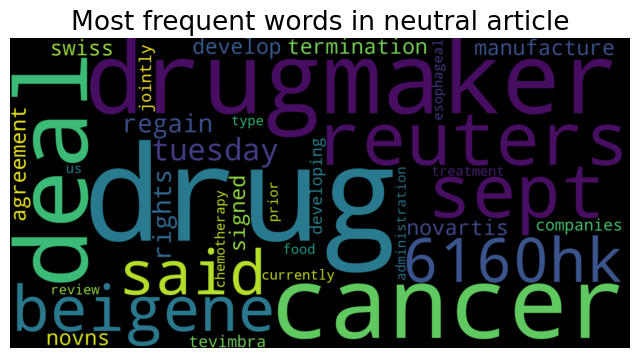

In [31]:
text = ' '.join([word for word in neutral_words_in_art['Article']])
plt.figure(figsize=(8,6), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral article', fontsize=19)
plt.show()

# ploted Star logo
star_logo = stylecloud.gen_stylecloud(text = text,size=458,icon_name='fas fa-star',
                                      palette='colorbrewer.sequential.YlOrBr_3',
                                      background_color='black',output_name='starstylecloud.png')

image3 = Image.open('starstylecloud.png')
image3.show()

##### Insights:
    1.) Leaf logo is visualized to show "Most frequent words in positive articles".
    2.) Book logo is visualized to show "Most frequent words in negative article".
    3.) Star logo is visualized to show "Most frequent words in neutral article".

### Model Evaluation

In [32]:
df[['Article','Sentiment']].head()

,Article,Sentiment
0,retailers makers foods marketed weight loss ty...,Positive
1,move ozempic theres new drug town eli lillys z...,Negative
2,sept 14 reuters bristol myers squibb bmyn said...,Positive
3,austin wolcott 18 years old pretty sure wouldn...,Positive
4,cancer often referred emperor maladies unyield...,Positive


In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
vect = CountVectorizer(ngram_range=(1,2)).fit(df['Article'])
vect

CountVectorizer(ngram_range=(1, 2))

In [35]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 12407

First 20 features:
 ['00007' '00007 brukinsa' '00012' '00012 median' '011' '011 11' '014'
 '014 14' '015' '015 apy' '033' '033 075' '050' '050 95' '06160'
 '06160 sse' '075' '075 00007' '087' '087 fundamentally']


In [36]:
X = df['Article']
Y = df['Sentiment']
X = vect.transform(X)

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [38]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (20, 12407)
Size of y_train: (20,)
Size of x_test: (5, 12407)
Size of y_test: (5,)


In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [40]:
lr_pred = lr.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [42]:
lr_acc = accuracy_score(lr_pred, y_test)
print("Test accuracy: {:.2f}%".format(lr_acc*100))

Test accuracy: 100.00%


In [43]:
print(confusion_matrix(y_test, lr_pred))
print("\n")
print(classification_report(y_test, lr_pred))

[[5]]


              precision    recall  f1-score   support

    Positive       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



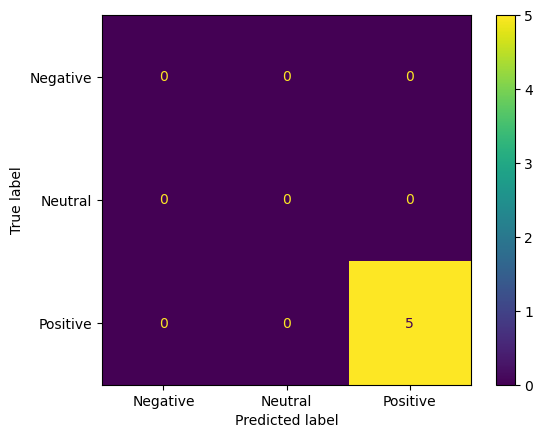

In [44]:
cm = confusion_matrix(y_test, lr_pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=lr.classes_)
disp.plot()

##### Insights:
    1.) Model Accuracy is 100%
    2.) Thus, we can now do Sentiment Analysis on it.

### 3.) Find Connections: We'll look for common themes across many articles, like seeing a pattern in tech news.
### 4.) Aspect Analysis (Optional): Gain deeper insights by understanding the sentiment towards different aspects of the news.

In [45]:
import spacy
import gensim
from gensim import corpora

In [46]:
# Load SpaCy model
nlp = spacy.load('en_core_web_sm')
nlp

In [47]:
# Function to perform topic modeling (LDA)
def perform_topic_modeling(text):
    # Tokenize the text
    tokens = [token.lemma_ for token in nlp(text) if not token.is_stop and not token.is_punct]
    
    # Create dictionary and corpus
    dictionary = corpora.Dictionary([tokens])
    corpus = [dictionary.doc2bow(tokens)]
    
    # Perform LDA
    lda_model = gensim.models.LdaModel(corpus, num_topics=3, id2word=dictionary)
    
    # Get topics
    topics = lda_model.print_topics()
    return topics

In [48]:
# Extract topics for each cleaned article
df['Connections'] = df['Article'].apply(perform_topic_modeling)
df.head()

,Article,polarity,Sentiment,Connections
0,retailers makers foods marketed weight loss ty...,0.060782,Positive,"[(0, 0.013*""drug"" + 0.011*""company"" + 0.007*""e..."
1,move ozempic theres new drug town eli lillys z...,-0.096854,Negative,"[(0, 0.014*""drug"" + 0.013*""obesity"" + 0.011*""o..."
2,sept 14 reuters bristol myers squibb bmyn said...,0.036147,Positive,"[(0, 0.026*""cell"" + 0.023*""blood"" + 0.019*""say..."
3,austin wolcott 18 years old pretty sure wouldn...,0.059811,Positive,"[(0, 0.015*""say"" + 0.014*""cart"" + 0.014*""cance..."
4,cancer often referred emperor maladies unyield...,0.199668,Positive,"[(0, 0.025*""cancer"" + 0.022*""therapy"" + 0.016*..."


In [49]:
for text in df['Connections']:
    print(text)

[(0, '0.013*"drug" + 0.011*"company" + 0.007*"executive" + 0.007*"weight" + 0.007*"like" + 0.006*"year" + 0.006*"percent" + 0.006*"loss" + 0.006*"market" + 0.005*"chief"'), (1, '0.020*"drug" + 0.011*"company" + 0.010*"weight" + 0.010*"like" + 0.008*"executive" + 0.007*"chief" + 0.007*"not" + 0.007*"percent" + 0.006*"loss" + 0.006*"girlboss"'), (2, '0.013*"drug" + 0.010*"like" + 0.009*"year" + 0.008*"company" + 0.008*"loss" + 0.007*"weight" + 0.007*"executive" + 0.007*"chief" + 0.006*"tell" + 0.006*"say"')]
[(0, '0.014*"drug" + 0.013*"obesity" + 0.011*"overweight" + 0.010*"zepbound" + 0.010*"weight" + 0.008*"obese" + 0.008*"medical" + 0.008*"disease" + 0.008*"dr" + 0.008*"approve"'), (1, '0.019*"drug" + 0.015*"obesity" + 0.011*"weight" + 0.010*"overweight" + 0.009*"zepbound" + 0.008*"statement" + 0.008*"diabete" + 0.008*"despite" + 0.008*"lilly" + 0.007*"disease"'), (2, '0.016*"obesity" + 0.016*"drug" + 0.012*"weight" + 0.011*"overweight" + 0.009*"management" + 0.008*"zepbound" + 0.008*

In [50]:
for text in df['Connections'].iloc[3:4]:
    print(text)

[(0, '0.015*"say" + 0.014*"cart" + 0.014*"cancer" + 0.011*"tcell" + 0.010*"cell" + 0.010*"therapy" + 0.008*"wolcott" + 0.007*"patient" + 0.007*"not" + 0.007*"s"'), (1, '0.022*"cart" + 0.020*"say" + 0.013*"tcell" + 0.013*"cell" + 0.013*"cancer" + 0.012*"therapy" + 0.009*"patient" + 0.009*"not" + 0.008*"wolcott" + 0.008*"new"'), (2, '0.020*"cart" + 0.020*"cancer" + 0.018*"say" + 0.012*"therapy" + 0.012*"cell" + 0.010*"tcell" + 0.009*"not" + 0.009*"patient" + 0.008*"new" + 0.008*"like"')]


In [51]:
# Define the themes as per connections found 
data = pd.DataFrame({
    'Article': df['Article'],
    'Connections': df['Connections'],
    'Themes': ['Pharmaceutical Industry News',
              'Health and Wellness (Focus on Obesity and Weight Management)',
              'Biotechnology and Cancer Therapy',
              'Immunotherapy for Cancer Treatment',
              'Cancer Treatment and Healthcare Costs',
              'Healthcare and Pharmaceutical Regulatory Updates',
              'Biotech Industry Partnerships and Agreements',
              'Drug Development and Cancer Research',
              'Medical Treatment Advances in Oncology',
              'Service Industry Operational Hours and Locations',
              'Legal Issues in Food Advertising',
              'Food Industry Delivery Innovations',
              'Fast Food Chain Performance Analysis',
              'Fast Food Menu Offerings and Pricing',
              'Fast Food Industry Trends and Offerings',
              'Financial Performance of Fast Food Chains',
              'Brand Marketing and Product Launches',
              'Artificial Intelligence in Restaurant Operations',
              'Fitness and Athlete Engagement',
              'Sportswear Brand App Features and User Experience',
              'Brand Strategy and Market Analysis',
              'Corporate Social Responsibility and Legal Matters',
              'Brand Advertising and Marketing Campaigns',
              'Airline Industry Disinformation and Customer Claims',
              'Banking and Financial Services Promotions'
             ]
})
data

,Article,Connections,Themes
0,retailers makers foods marketed weight loss ty...,"[(0, 0.013*""drug"" + 0.011*""company"" + 0.007*""e...",Pharmaceutical Industry News
1,move ozempic theres new drug town eli lillys z...,"[(0, 0.014*""drug"" + 0.013*""obesity"" + 0.011*""o...",Health and Wellness (Focus on Obesity and Weig...
2,sept 14 reuters bristol myers squibb bmyn said...,"[(0, 0.026*""cell"" + 0.023*""blood"" + 0.019*""say...",Biotechnology and Cancer Therapy
3,austin wolcott 18 years old pretty sure wouldn...,"[(0, 0.015*""say"" + 0.014*""cart"" + 0.014*""cance...",Immunotherapy for Cancer Treatment
4,cancer often referred emperor maladies unyield...,"[(0, 0.025*""cancer"" + 0.022*""therapy"" + 0.016*...",Cancer Treatment and Healthcare Costs
5,nov 28 reuters us food drug administration fda...,"[(0, 0.023*""therapy"" + 0.014*""tcell"" + 0.014*""...",Healthcare and Pharmaceutical Regulatory Updates
6,nov 21 reuters beigene 6160hk said tuesday ent...,"[(0, 0.038*""ensem"" + 0.037*""payment"" + 0.031*""...",Biotech Industry Partnerships and Agreements
7,sept 19 reuters drugmaker beigene 6160hk said ...,"[(0, 0.083*""drug"" + 0.046*""deal"" + 0.044*""canc...",Drug Development and Cancer Research
8,brukinsa first btk inhibitor approved follicul...,"[(0, 0.019*""brukinsa"" + 0.012*""beigene"" + 0.01...",Medical Treatment Advances in Oncology
9,whether youre looking quick bite eat sitdown e...,"[(0, 0.089*""hour"" + 0.043*""restaurant"" + 0.039...",Service Industry Operational Hours and Locations


In [52]:
# Define the Aspects and sentiments for all themes
data = {
    "Theme": ["Pharmaceutical Industry News"] * 3 +
             ["Health and Wellness (Focus on Obesity and Weight Management)"] * 3 +
             ["Biotechnology and Cancer Therapy"] * 3 +
             ["Immunotherapy for Cancer Treatment"] * 3 +
             ["Cancer Treatment and Healthcare Costs"] * 3 +
             ["Healthcare and Pharmaceutical Regulatory Updates"] * 3 +
             ["Biotech Industry Partnerships and Agreements"] * 3 +
             ["Drug Development and Cancer Research"] * 3 +
             ["Medical Treatment Advances in Oncology"] * 3 +
             ["Service Industry Operational Hours and Locations"] * 3 +
             ["Legal Issues in Food Advertising"] * 3 +
             ["Food Industry Delivery Innovations"] * 3 +
             ["Fast Food Chain Performance Analysis"] * 3 +
             ["Fast Food Menu Offerings and Pricing"] * 3 +
             ["Fast Food Industry Trends and Offerings"] * 3 +
             ["Financial Performance of Fast Food Chains"] * 3 +
             ["Brand Marketing and Product Launches"] * 3 +
             ["Artificial Intelligence in Restaurant Operations"] * 3 +
             ["Fitness and Athlete Engagement"] * 3 +
             ["Sportswear Brand App Features and User Experience"] * 3 +
             ["Brand Strategy and Market Analysis"] * 3 +
             ["Corporate Social Responsibility and Legal Matters"] * 3 +
             ["Brand Advertising and Marketing Campaigns"] * 3 +
             ["Airline Industry Disinformation and Customer Claims"] * 3 +
             ["Banking and Financial Services Promotions"] * 3,
    "Aspect": ["Innovation", "Drug Safety", "Market Impact"] +
              ["Treatment Effectiveness", "Lifestyle Impact", "Cost of Treatment"] +
              ["Research Progress", "Treatment Accessibility", "Side Effects"] +
              ["Treatment Efficacy", "Cost of Treatment", "Patient Response"] +
              ["Affordability", "Insurance Coverage", "Treatment Outcome"] +
              ["Regulation Clarity", "Compliance Challenges", "Patient Safety"] +
              ["Collaboration Benefits", "Competitive Advantage", "Intellectual Property Issues"] +
              ["Breakthroughs", "Research Funding", "Clinical Trials"] +
              ["Treatment Innovation", "Accessibility", "Treatment Side Effects"] +
              ["Convenience", "Availability", "Accessibility"] +
              ["Consumer Protection", "Marketing Ethics", "Regulatory Compliance"] +
              ["Convenience", "Environmental Impact", "Pricing"] +
              ["Sales Growth", "Customer Satisfaction", "Health Concerns"] +
              ["Variety", "Affordability", "Health Value"] +
              ["Innovation", "Customer Preferences", "Market Competition"] +
              ["Profitability", "Market Share", "Investment Potential"] +
              ["Brand Image", "Marketing Strategy", "Product Reception"] +
              ["Efficiency Improvement", "Labor Impact", "Customer Experience"] +
              ["Health Promotion", "Athlete Endorsements", "Accessibility"] +
              ["Innovation", "User Interface", "Customer Feedback"] +
              ["Market Positioning", "Competitor Analysis", "Customer Perception"] +
              ["Social Impact", "Legal Compliance", "Ethical Standards"] +
              ["Brand Awareness", "Campaign Creativity", "Audience Engagement"] +
              ["Transparency", "Customer Trust", "Service Quality"] +
              ["Financial Inclusion", "Customer Benefits", "Regulatory Compliance"],
    "Sentiment": ["Positive", "Neutral", "Positive"] +
                 ["Positive", "Neutral", "Negative"] +
                 ["Positive", "Neutral", "Negative"] +
                 ["Positive", "Negative", "Positive"] +
                 ["Negative", "Neutral", "Positive"] +
                 ["Neutral", "Negative", "Positive"] +
                 ["Positive", "Neutral", "Negative"] +
                 ["Positive", "Neutral", "Negative"] +
                 ["Positive", "Neutral", "Negative"] +
                 ["Positive", "Neutral", "Neutral"] + 
                 ["Positive", "Negative", "Neutral"] +
                 ["Positive", "Neutral", "Neutral"] +
                 ["Positive", "Neutral", "Negative"] +
                 ["Positive", "Neutral", "Negative"] +
                 ["Positive", "Neutral", "Neutral"] +
                 ["Positive", "Neutral", "Positive"] + 
                 ["Positive", "Positive", "Neutral"] +
                 ["Positive", "Negative", "Neutral"] +
                 ["Positive", "Positive", "Neutral"] +
                 ["Positive", "Positive", "Neutral"] + 
                 ["Positive", "Neutral", "Positive"] +
                 ["Positive", "Neutral", "Positive"] +
                 ["Positive", "Positive", "Positive"] +
                 ["Negative", "Negative", "Neutral"] +
                 ["Positive", "Positive", "Neutral"]
}

# Create DataFrame
df = pd.DataFrame(data)
df

,Theme,Aspect,Sentiment
0,Pharmaceutical Industry News,Innovation,Positive
1,Pharmaceutical Industry News,Drug Safety,Neutral
2,Pharmaceutical Industry News,Market Impact,Positive
3,Health and Wellness (Focus on Obesity and Weig...,Treatment Effectiveness,Positive
4,Health and Wellness (Focus on Obesity and Weig...,Lifestyle Impact,Neutral
...,...,...,...
70,Airline Industry Disinformation and Customer C...,Customer Trust,Negative
71,Airline Industry Disinformation and Customer C...,Service Quality,Neutral
72,Banking and Financial Services Promotions,Financial Inclusion,Positive
73,Banking and Financial Services Promotions,Customer Benefits,Positive


In [53]:
df.head(12)

,Theme,Aspect,Sentiment
0,Pharmaceutical Industry News,Innovation,Positive
1,Pharmaceutical Industry News,Drug Safety,Neutral
2,Pharmaceutical Industry News,Market Impact,Positive
3,Health and Wellness (Focus on Obesity and Weig...,Treatment Effectiveness,Positive
4,Health and Wellness (Focus on Obesity and Weig...,Lifestyle Impact,Neutral
5,Health and Wellness (Focus on Obesity and Weig...,Cost of Treatment,Negative
6,Biotechnology and Cancer Therapy,Research Progress,Positive
7,Biotechnology and Cancer Therapy,Treatment Accessibility,Neutral
8,Biotechnology and Cancer Therapy,Side Effects,Negative
9,Immunotherapy for Cancer Treatment,Treatment Efficacy,Positive
